##  Author : Riasad Alvi
### 22 Jan 2025

In [26]:
# Importing the EfficientNetV2S model from TensorFlow Keras Applications
from tensorflow.keras.applications import efficientnet_v2
EfficientNetV2S = efficientnet_v2.EfficientNetV2S
# EfficientNetV2S: A specific variant of the EfficientNetV2 family of convolutional neural networks designed for high accuracy and efficiency.

# Importing utilities for image preprocessing and prediction decoding
from tensorflow.keras.preprocessing import image
# `image`: Provides functions for loading and preprocessing image data.

from tensorflow.keras.applications.efficientnet_v2 import preprocess_input, decode_predictions
# preprocess_input: Prepares image data for input into the EfficientNetV2 model by normalizing it appropriately.
# decode_predictions: Converts raw model predictions into human-readable class labels.

import numpy as np
# numpy: A library for numerical computations, often used for manipulating arrays and tensors.


In [27]:
model = EfficientNetV2S(weights='imagenet')
# Initializes the EfficientNetV2S model pre-trained on the ImageNet dataset.


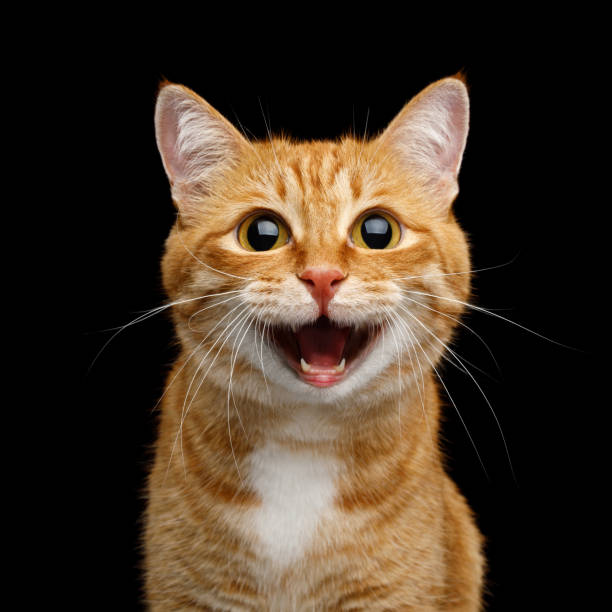

In [28]:
from IPython.display import Image
img_path = '/content/cat.jpg'
display(Image(filename=img_path))

In [29]:
# Specify the path to the image
img_path = '/content/cat.jpg'

# Load the image from the specified path and resize it to (384, 384)
img = image.load_img(img_path, target_size=(384, 384))
# `image.load_img`: Loads the image as a PIL object, resizing it to match the input size required by EfficientNetV2S (384x384).

# Convert the image to a NumPy array
x = image.img_to_array(img)
# `image.img_to_array`: Converts the PIL image to a NumPy array for processing.

# Expand the dimensions of the array to create a batch of size 1
x = np.expand_dims(x, axis=0)
# Adds a new dimension at index 0, making the shape (1, 384, 384, 3). This batch format is required by the model.

# Preprocess the image data to match the input format expected by EfficientNetV2S
x = preprocess_input(x)
# `preprocess_input`: Normalizes pixel values (e.g., scaling, mean subtraction) as expected by EfficientNetV2 models.



### **Purpose and Significance**
- **Purpose**: Prepares the image for input into the EfficientNetV2S model by resizing, normalizing, and converting it to the correct format.
- **Significance**:
  - **Resizing**: Ensures the image matches the input size required by EfficientNetV2S (384x384).
  - **Normalization**: Adjusts the image pixel values to the range and distribution expected by the pre-trained model, which is crucial for accurate predictions.
  - **Batch Formatting**: Expands the input to include a batch dimension, even if there’s only one image, as models expect inputs in batch format.


In [30]:
# Generate predictions for the preprocessed input image
preds = model.predict(x)
# `model.predict`: Feeds the preprocessed image `x` through the EfficientNetV2S model to get predictions.
# The output `preds` is an array of probabilities corresponding to the 1,000 classes in ImageNet.

# Decode and display the top 3 predictions
print('Predicted:', decode_predictions(preds, top=3)[0])
# `decode_predictions`: Converts the raw model outputs into human-readable class labels with their respective probabilities.
# `top=3`: Retrieves the top 3 most likely class predictions.
# `[0]`: Accesses the first batch's results since the input is a single image.


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Predicted: [('n02123159', 'tiger_cat', 0.64370674), ('n02123045', 'tabby', 0.23647878), ('n02124075', 'Egyptian_cat', 0.023416717)]


### **Example Output Explanation**

```
Predicted: [('n02123159', 'tiger_cat', 0.64370674), ('n02123045', 'tabby', 0.23647878), ('n02124075', 'Egyptian_cat', 0.023416717)]
```

#### **Decoded Predictions:**
1. **`('n02123159', 'tiger_cat', 0.64370674)`**:
   - **WordNet ID**: `n02123159`
   - **Class Label**: `tiger_cat`
   - **Probability**: `0.6437` (~64.37%)
   - **Explanation**: The model predicts that the image most likely belongs to the "tiger cat" class with a confidence of approximately 64.37%.

2. **`('n02123045', 'tabby', 0.23647878)`**:
   - **WordNet ID**: `n02123045`
   - **Class Label**: `tabby`
   - **Probability**: `0.2365` (~23.65%)
   - **Explanation**: The second most likely class is "tabby cat," with a confidence of about 23.65%.

3. **`('n02124075', 'Egyptian_cat', 0.023416717)`**:
   - **WordNet ID**: `n02124075`
   - **Class Label**: `Egyptian_cat`
   - **Probability**: `0.0234` (~2.34%)
   - **Explanation**: The third prediction is "Egyptian cat," with a low confidence of approximately 2.34%.

#### **Overall Interpretation**:
- The model is most confident that the image belongs to the "tiger cat" class (64.37% probability).
- While the "tabby cat" class is also a possibility (23.65%), the confidence is significantly lower.
- The "Egyptian cat" class has minimal likelihood (2.34%).

The results indicate that the input image is most likely a tiger cat, with a slight chance of being a tabby cat.